In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [ ]:
!wget -q https://dlcdn.apache.org/spark/spark-3.2.1/spark-3.2.1-bin-hadoop3.2.tgz

In [ ]:
!tar xf spark-3.2.1-bin-hadoop3.2.tgz

In [ ]:
!pip install -q findspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.1-bin-hadoop3.2"

In [ ]:
!pip install pyspark

     |████████████████████████████████| 281.4 MB 31 kB/s 
     |████████████████████████████████| 198 kB 45.0 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.1-py2.py3-none-any.whl size=281853642 sha256=b3087b0c6f2e2230ef4710fa27e71255f9108e1cb00c5a8b005a8ff299d379fa
  Stored in directory: /root/.cache/pip/wheels/9f/f5/07/7cd8017084dce4e93e84e92efd1e1d5334db05f2e83bcef74f
Successfully built pyspark


In [ ]:
# import all required modules
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
from pyspark import SparkContext
from  pyspark.sql  import SQLContext
from pyspark.sql.functions import mean, min, max, avg, stddev, desc, isnull, col, log, lit
from pyspark.mllib.stat import Statistics
from pyspark.sql.types import DoubleType

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt
import pyspark
from pyspark.sql.types import *
spark = pyspark.sql.SparkSession.builder.appName("Spark-Dataframe-SQL-real-estate").getOrCreate()

In [ ]:
!pip -q install pyspark flasgger

     |████████████████████████████████| 3.8 MB 3.3 MB/s 


In [ ]:
import plotly.express as px
from pyspark.sql import SparkSession, functions as f

In [ ]:
spark = SparkSession.builder.master('local[3]').appName('Realestate').getOrCreate()

In [ ]:
import pandas 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = spark.read.csv('/content/drive/MyDrive/Spark_Toulouse/project_data_real_estate_toulouse_and_suburbs.csv',header=True,inferSchema=True)

In [ ]:
df.show(5)

+--------------------------------------------------------------------------------------+
|SaleDate;SaleType;Price;PostCode;City;NbRooms;NbLots;ResidenceType;LivingArea;LandArea|
+--------------------------------------------------------------------------------------+
|                                                                  15/01/2019;SALE;9...|
|                                                                  21/01/2019;SALE;2...|
|                                                                  03/01/2019;SALE;1...|
|                                                                  11/01/2019;SALE;5...|
|                                                                  15/01/2019;SALE;1...|
+--------------------------------------------------------------------------------------+
only showing top 5 rows



In [ ]:
dfschema = StructType([StructField("SaleDate", StringType(), False),
                       StructField("SaleType", StringType(),False),
                       StructField("Price", IntegerType(), False),
                       StructField("PostCode", StringType(), False),
                       StructField("City", StringType(), False),
                       StructField("NbRooms",IntegerType(),False),
                       StructField("NbLots",IntegerType(),False),
                       StructField("ResidenceType", StringType(), False),
                       StructField("LivingArea", IntegerType(), False),
                       StructField("LandArea", IntegerType(), False) ])

In [ ]:
df = spark.read.csv('/content/drive/MyDrive/Spark_Toulouse/project_data_real_estate_toulouse_and_suburbs.csv',schema=dfschema)
df.show(5)


+--------------------+--------+-----+--------+----+-------+------+-------------+----------+--------+
|            SaleDate|SaleType|Price|PostCode|City|NbRooms|NbLots|ResidenceType|LivingArea|LandArea|
+--------------------+--------+-----+--------+----+-------+------+-------------+----------+--------+
|SaleDate;SaleType...|    null| null|    null|null|   null|  null|         null|      null|    null|
|15/01/2019;SALE;9...|    null| null|    null|null|   null|  null|         null|      null|    null|
|21/01/2019;SALE;2...|    null| null|    null|null|   null|  null|         null|      null|    null|
|03/01/2019;SALE;1...|    null| null|    null|null|   null|  null|         null|      null|    null|
|11/01/2019;SALE;5...|    null| null|    null|null|   null|  null|         null|      null|    null|
+--------------------+--------+-----+--------+----+-------+------+-------------+----------+--------+
only showing top 5 rows



In [ ]:
df.toPandas().shape

(80119, 10)

In [ ]:
df.toPandas().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80119 entries, 0 to 80118
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SaleDate       80119 non-null  object 
 1   SaleType       3013 non-null   object 
 2   Price          0 non-null      float64
 3   PostCode       0 non-null      object 
 4   City           0 non-null      object 
 5   NbRooms        0 non-null      float64
 6   NbLots         0 non-null      float64
 7   ResidenceType  0 non-null      object 
 8   LivingArea     0 non-null      float64
 9   LandArea       0 non-null      float64
dtypes: float64(5), object(5)
memory usage: 6.1+ MB


In [ ]:
#describe()
df.toPandas().describe()

,Price,NbRooms,NbLots,LivingArea,LandArea
count,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN


In [ ]:
import pyspark.sql.functions as f

evolution_price= df.groupBy('SaleDate')\
                                         .agg(f.sum('Price')/f.sum('LivingArea'))\
                                         .withColumnRenamed('(sum(Price) / sum(LivingArea))', 'Price_square')\
                                         .orderBy('Price_square', ascending=False)

evolution_price.show(10)

+--------------------+------------+
|            SaleDate|Price_square|
+--------------------+------------+
|31/08/2018;SALE;2...|        null|
|29/03/2017;SALE;1...|        null|
|11/02/2019;SALE;1...|        null|
|23/10/2017;SALE;5...|        null|
|16/02/2016;SALE B...|        null|
|25/08/2015;SALE;1...|        null|
|31/08/2015;SALE B...|        null|
|17/09/2015;SALE;1...|        null|
|22/12/2015;SALE;3...|        null|
|08/01/2019;SALE;7...|        null|
+--------------------+------------+
only showing top 10 rows



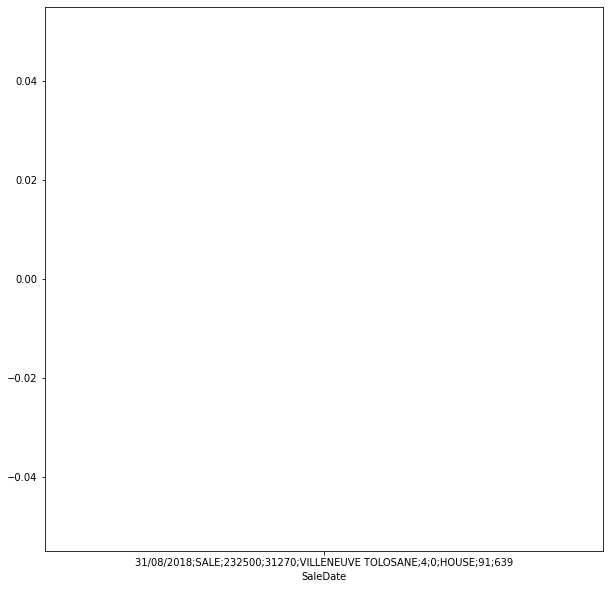

In [ ]:
plt.figure(figsize=(10,10))
sns.lineplot(x='SaleDate',y='Price_square' ,data=evolution_price.toPandas())

In [ ]:
df_evolution_price=evolution_price.toPandas()
df_evolution_price.set_index("SaleDate",inplace=True)

In [ ]:
import pyspark.sql.functions as f

evolution_price_per_city = df.groupBy('City')\
                                         .agg(f.sum('Price')/f.sum('LivingArea'))\
                                         .withColumnRenamed('(sum(Price) / sum(LivingArea))', 'Price_square')\
                                         .orderBy('Price_square', ascending=False)

evolution_price_per_city .show(10)